In [128]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt



connectionDB = sqlite3.connect("lahman2014.sqlite")
firstpart_query = "SELECT teamID,name, yearID as Year, W as Wins, G as Games,"
secondpart_query=" 100*CAST(W AS float)/G AS WinRate FROM Teams GROUP BY yearID, teamID ORDER BY teamID"

FinalTeamTable = pd.read_sql(firstpart_query+secondpart_query, connectionDB)
FinalTeamTable=FinalTeamTable.sort_values('WinRate', ascending=False) 
FinalTeamTable["WinRate"] = FinalTeamTable["WinRate"].apply(lambda x :str(round(float(x), 2))+"%" )
FinalTeamTable


,teamID,name,Year,Wins,Games,WinRate
372,BS1,Boston Red Stockings,1875,71,82,86.59%
2560,SLU,St. Louis Maroons,1884,94,114,82.46%
369,BS1,Boston Red Stockings,1872,39,48,81.25%
606,CHN,Chicago White Stockings,1876,52,66,78.79%
610,CHN,Chicago White Stockings,1880,67,86,77.91%
...,...,...,...,...,...,...
1172,ELI,Elizabeth Resolutes,1873,2,23,8.7%
1321,KEO,Keokuk Westerns,1875,1,13,7.69%
289,BR2,Brooklyn Atlantics,1875,2,44,4.55%
2765,WS4,Washington Nationals,1872,0,11,0.0%


In [129]:

teamSalaries=pd.read_sql("select teamid, yearid as Years ,sum(salary) as totalPayroll from salaries group by yearid,"+
                         " teamid order by teamid ",connectionDB)
teamSalaries

,teamID,Years,totalPayroll
0,ANA,1997,31135472.0
1,ANA,1998,41281000.0
2,ANA,1999,55388166.0
3,ANA,2000,51464167.0
4,ANA,2001,47535167.0
...,...,...,...
855,WAS,2010,61400000.0
856,WAS,2011,63856928.0
857,WAS,2012,80855143.0
858,WAS,2013,113703270.0


In [130]:
totalSalary_teamTable = teamSalaries.merge(FinalTeamTable, how ="inner",left_on=["Years", "teamID"]
                                            ,right_on=["Year", "teamID"])
totalSalary_teamTable = totalSalary_teamTable.drop('Years', axis=1)
totalSalary_teamTable


,teamID,totalPayroll,name,Year,Wins,Games,WinRate
0,ANA,31135472.0,Anaheim Angels,1997,84,162,51.85%
1,ANA,41281000.0,Anaheim Angels,1998,85,162,52.47%
2,ANA,55388166.0,Anaheim Angels,1999,70,162,43.21%
3,ANA,51464167.0,Anaheim Angels,2000,82,162,50.62%
4,ANA,47535167.0,Anaheim Angels,2001,75,162,46.3%
...,...,...,...,...,...,...,...
853,WAS,61400000.0,Washington Nationals,2010,69,162,42.59%
854,WAS,63856928.0,Washington Nationals,2011,80,161,49.69%
855,WAS,80855143.0,Washington Nationals,2012,98,162,60.49%
856,WAS,113703270.0,Washington Nationals,2013,86,162,53.09%


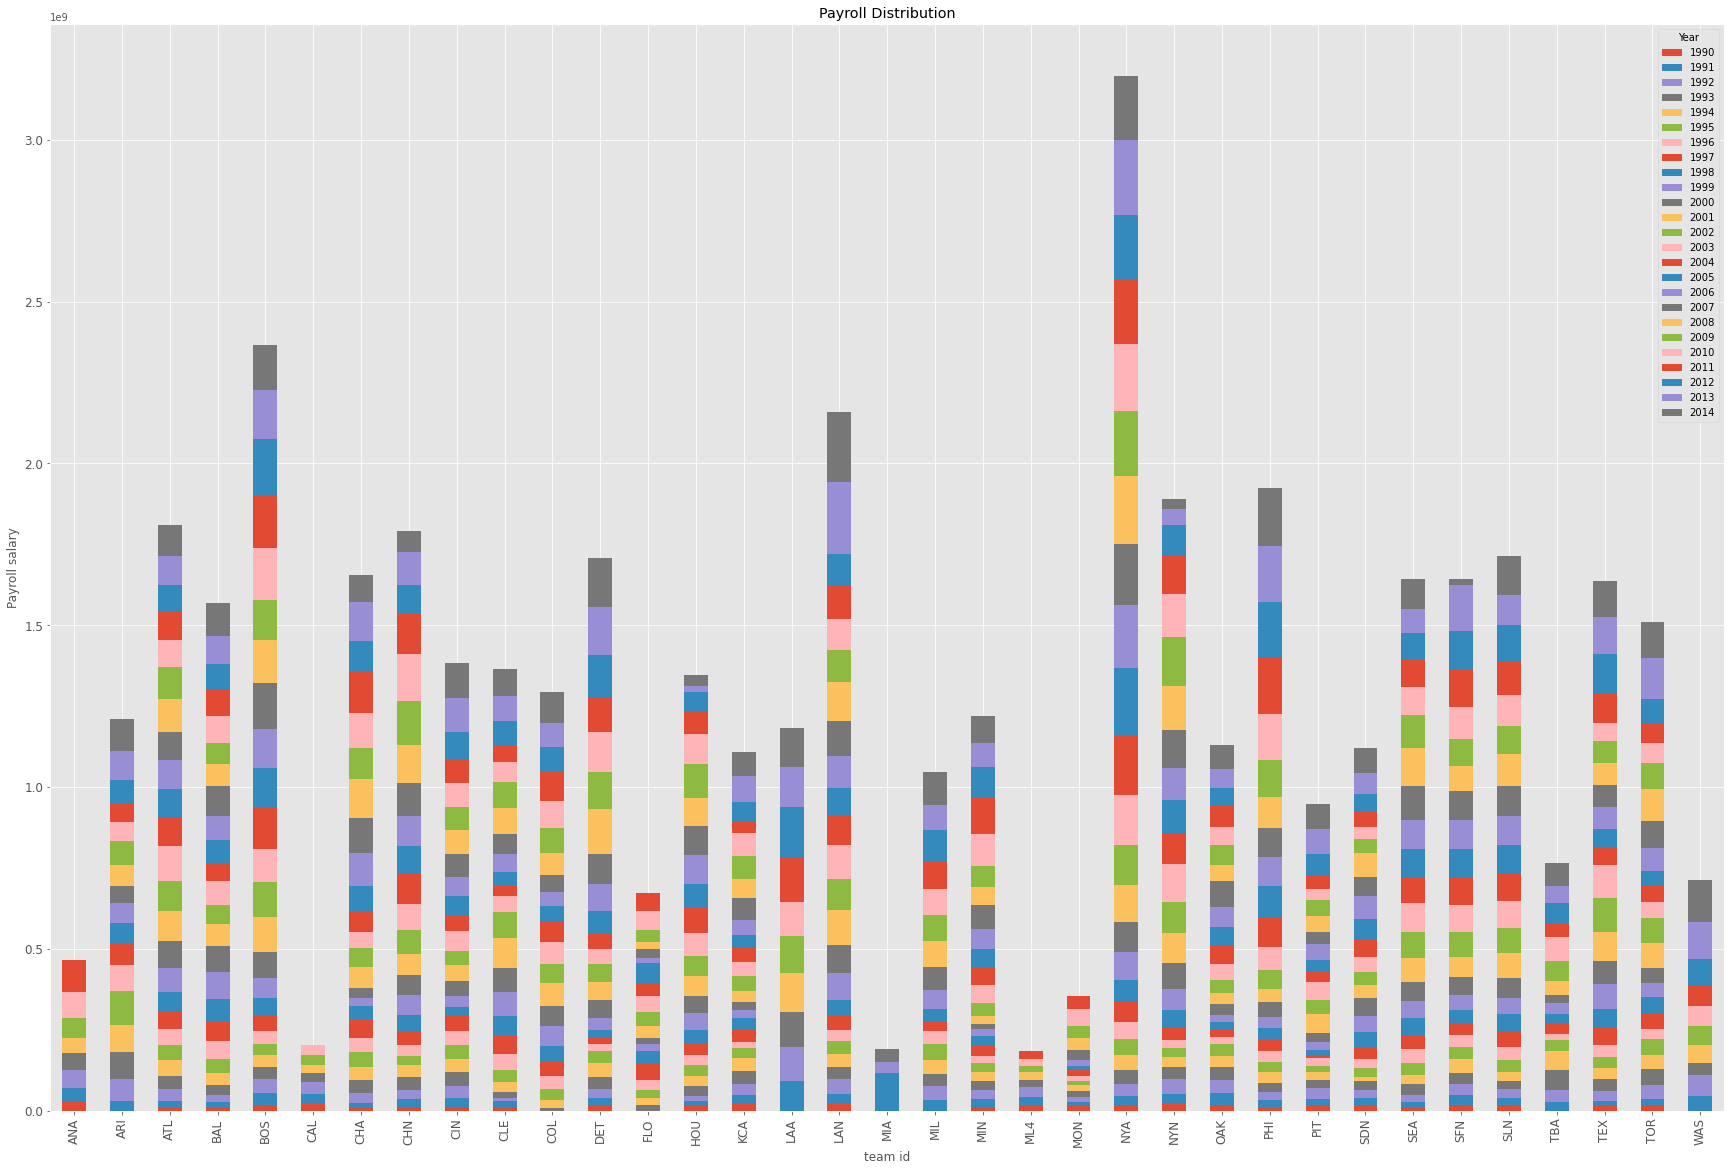

In [131]:
Temp = totalSalary_teamTable[totalSalary_teamTable.Year > 1989]
Temp = Temp[Temp.Year < 2015]
FilterDateTable = Temp.pivot(index ='teamID', columns='Year', values='totalPayroll')
FilterDateTable = FilterDateTable.fillna(0) 
FilterDateTable

FilterDateTable.plot(kind = 'bar',title ="Payroll Distribution",
                     stacked = True, figsize=(30, 20),
                     legend=True, fontsize=12)
plt.ylabel("Payroll salary")
plt.xlabel("team id")
plt.show()

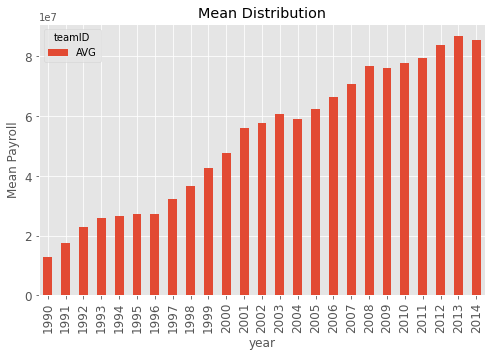

In [132]:
FilterDateTableMean = FilterDateTable.mean()
FilterDateTableSTD = FilterDateTable.std()

FilterDateTable.loc['AVG'] = FilterDateTableMean
FilterDateTable.loc['STD_DEV'] = FilterDateTableSTD
# Plot mean calculated above for every year
FilterDateTable_mean = FilterDateTable.drop(FilterDateTable.index[range(0,35)])
FilterDateTable_mean = FilterDateTable_mean.drop(FilterDateTable_mean.index[range(1,2)])
FilterDateTable_mean = FilterDateTable_mean.transpose()
FilterDateTable_mean.plot(kind = 'bar',title ="Mean Distribution", figsize=(8, 5), legend=True, fontsize=12)
plt.xlabel("year")
plt.ylabel("Mean Payroll")
plt.show()


In [133]:

ind1 = []
ind2 = []
for i, row in totalSalary_teamTable.iterrows():
    checker = 0
    for year in FilterDateTable:
        if (year == (row['Year'])):
            ind2.append(FilterDateTable[year].STD_DEV)
            ind1.append(FilterDateTable[year].AVG)
            checker = checker + 1
    if (checker == 0):
        ind2.append(np.NaN)
        ind2.append(np.NaN)
# Adding information to the table 
averages = pd.DataFrame(list1, columns = ['raw'])
stddevs = pd.DataFrame(list2, columns = ['raw'])
totalSalary_teamTable['AVG'] = averages           
totalSalary_teamTable['STD_DEV'] = stddevs
# Adding a new column computing the standard payroll of each team and their corresponding year
totalSalary_teamTable['STD_Payroll'] = (totalSalary_teamTable['totalPayroll']-totalSalary_teamTable['AVG'])
/ (totalSalary_teamTable['STD_DEV'])
totalSalary_teamTable

,teamID,totalPayroll,name,Year,Wins,Games,WinRate,AVG,STD_DEV,STD_Payroll
0,ANA,31135472.0,Anaheim Angels,1997,84,162,51.85%,3.220817e+07,2.006071e+07,-1.072696e+06
1,ANA,41281000.0,Anaheim Angels,1998,85,162,52.47%,3.652237e+07,2.075168e+07,4.758632e+06
2,ANA,55388166.0,Anaheim Angels,1999,70,162,43.21%,4.269225e+07,2.594807e+07,1.269592e+07
3,ANA,51464167.0,Anaheim Angels,2000,82,162,50.62%,4.760386e+07,2.792851e+07,3.860307e+06
4,ANA,47535167.0,Anaheim Angels,2001,75,162,46.3%,5.601895e+07,3.254380e+07,-8.483785e+06
...,...,...,...,...,...,...,...,...,...,...
853,WAS,61400000.0,Washington Nationals,2010,69,162,42.59%,7.775314e+07,4.771102e+07,-1.635314e+07
854,WAS,63856928.0,Washington Nationals,2011,80,161,49.69%,7.955729e+07,5.006589e+07,-1.570037e+07
855,WAS,80855143.0,Washington Nationals,2012,98,162,60.49%,8.379261e+07,4.858813e+07,-2.937462e+06
856,WAS,113703270.0,Washington Nationals,2013,86,162,53.09%,8.670073e+07,5.764924e+07,2.700254e+07


In [134]:
years = [1990,1995,2000,2005,2010,2015]
groups=['period_1','period_2','period_3','period_4','period_5']
totalSalary_teamTable['period'] = pd.cut(totalSalary_teamTable['Year'],years,right=False, labels=groups)
totalSalary_teamTable

,teamID,totalPayroll,name,Year,Wins,Games,WinRate,AVG,STD_DEV,STD_Payroll,period
0,ANA,31135472.0,Anaheim Angels,1997,84,162,51.85%,3.220817e+07,2.006071e+07,-1.072696e+06,period_2
1,ANA,41281000.0,Anaheim Angels,1998,85,162,52.47%,3.652237e+07,2.075168e+07,4.758632e+06,period_2
2,ANA,55388166.0,Anaheim Angels,1999,70,162,43.21%,4.269225e+07,2.594807e+07,1.269592e+07,period_2
3,ANA,51464167.0,Anaheim Angels,2000,82,162,50.62%,4.760386e+07,2.792851e+07,3.860307e+06,period_3
4,ANA,47535167.0,Anaheim Angels,2001,75,162,46.3%,5.601895e+07,3.254380e+07,-8.483785e+06,period_3
...,...,...,...,...,...,...,...,...,...,...,...
853,WAS,61400000.0,Washington Nationals,2010,69,162,42.59%,7.775314e+07,4.771102e+07,-1.635314e+07,period_5
854,WAS,63856928.0,Washington Nationals,2011,80,161,49.69%,7.955729e+07,5.006589e+07,-1.570037e+07,period_5
855,WAS,80855143.0,Washington Nationals,2012,98,162,60.49%,8.379261e+07,4.858813e+07,-2.937462e+06,period_5
856,WAS,113703270.0,Washington Nationals,2013,86,162,53.09%,8.670073e+07,5.764924e+07,2.700254e+07,period_5


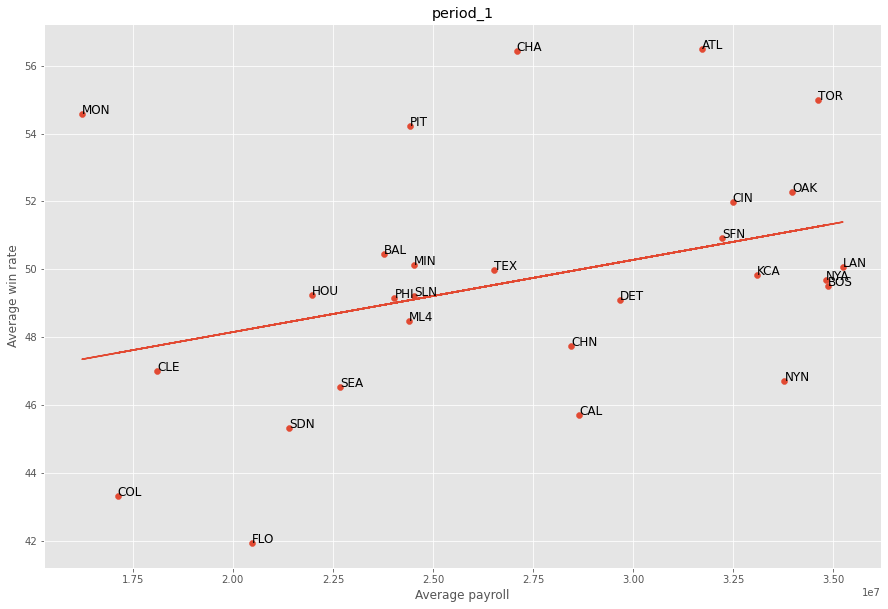

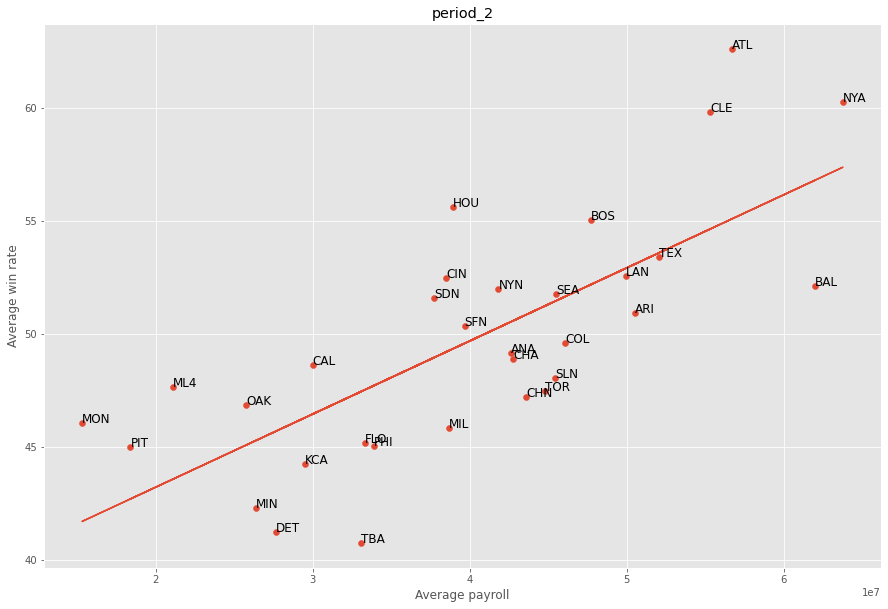

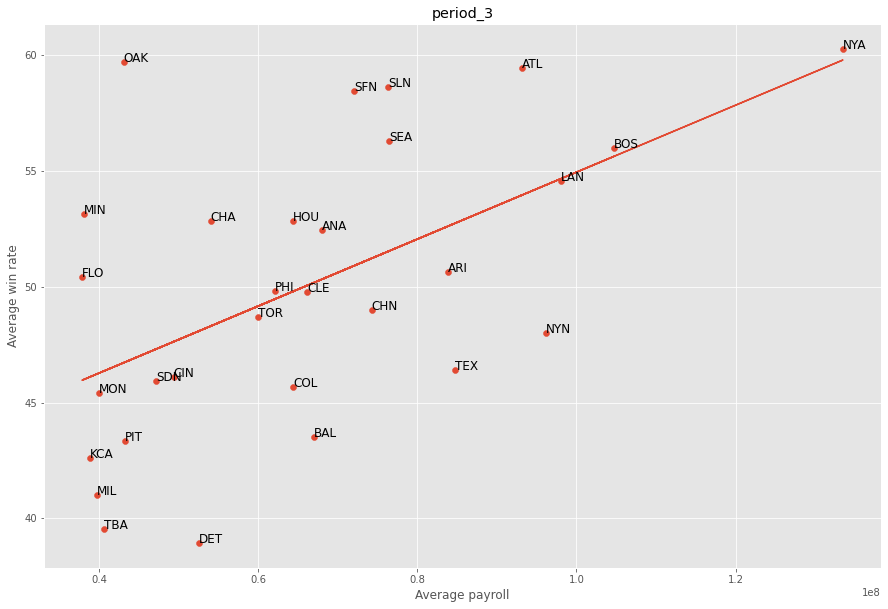

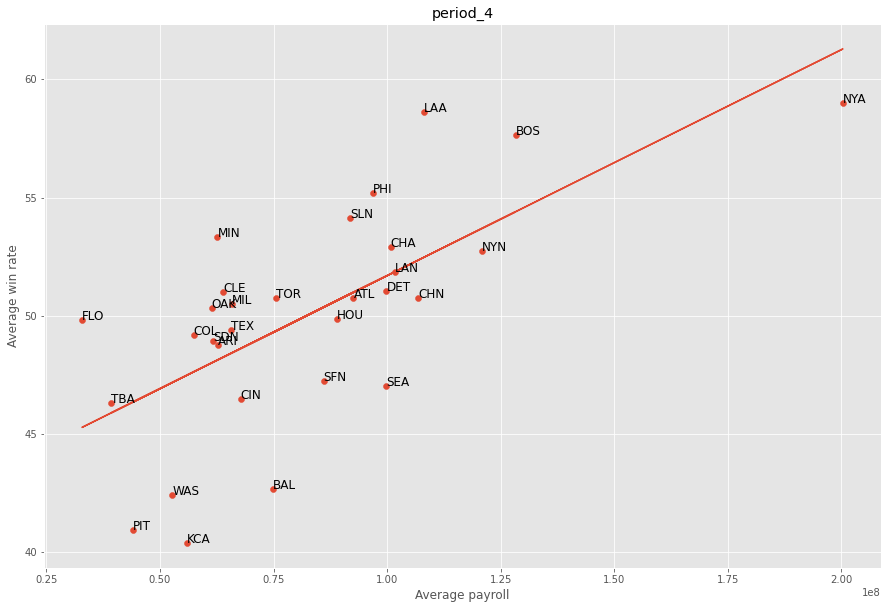

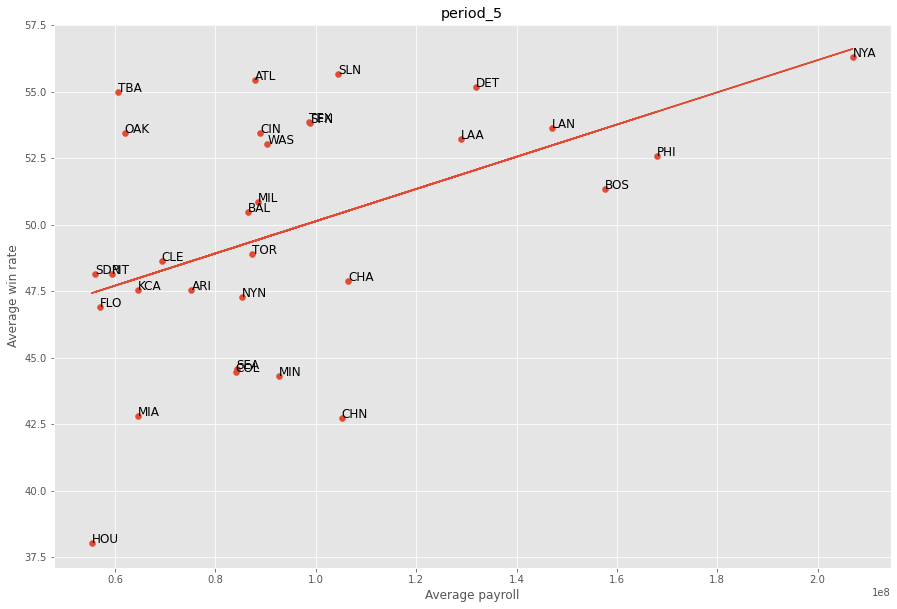

In [135]:
totalSalary_teamTable["WinRate"] = totalSalary_teamTable["WinRate"].apply(lambda x :float(str(x)[:-1]))

for period in groups:
    # Computing average total payroll and win rate for each team per period
    sameatperiod = totalSalary_teamTable[totalSalary_teamTable.period  == period]
    pay = sameatperiod.pivot(index='Year', columns='teamID', values='totalPayroll')
    win = sameatperiod.pivot(index='Year', columns='teamID', values='WinRate')
    x_data = pay.mean().values
    y_data = win.mean().values
    # Making a scatter plot and drawing a regression line
    fit = np.polyfit(x = x_data,y = y_data,deg = 1)
    plt.figure(figsize = (15,10))
    plt.plot(x_data, fit[0] * x_data + fit[1])
    plt.scatter(x_data, y_data)
    pay = pay.transpose()
     #annotate each point with its team name.
    for i, txt in enumerate(pay.index):
        plt.annotate(txt, (x_data[i],y_data[i]),size=12)
    plt.xlabel("Average payroll")
    plt.ylabel("Average win rate")
    plt.title(period)
    plt.show()

        

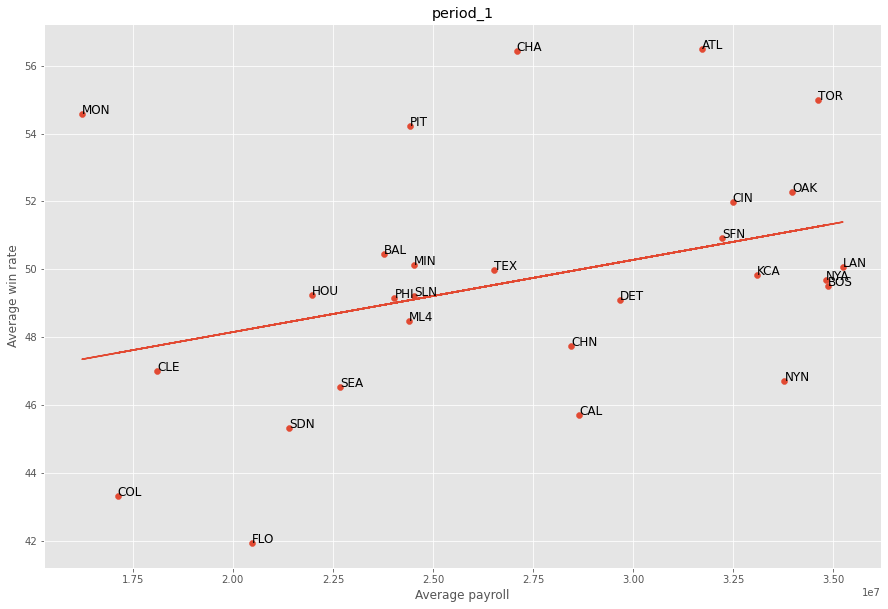

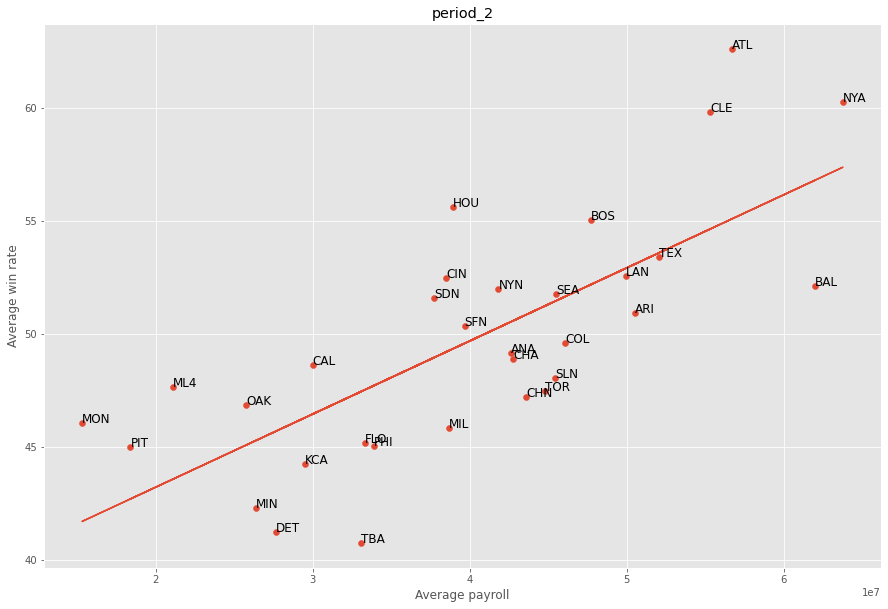

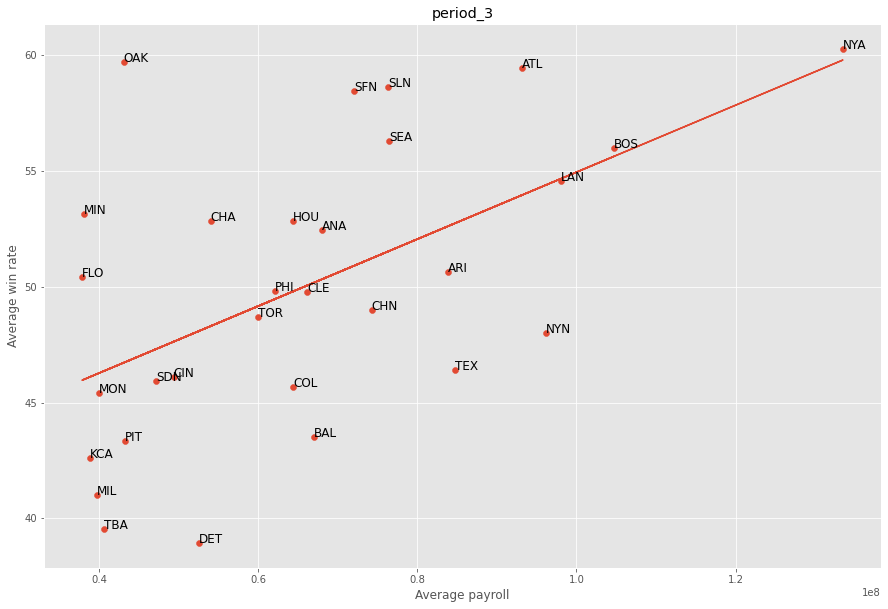

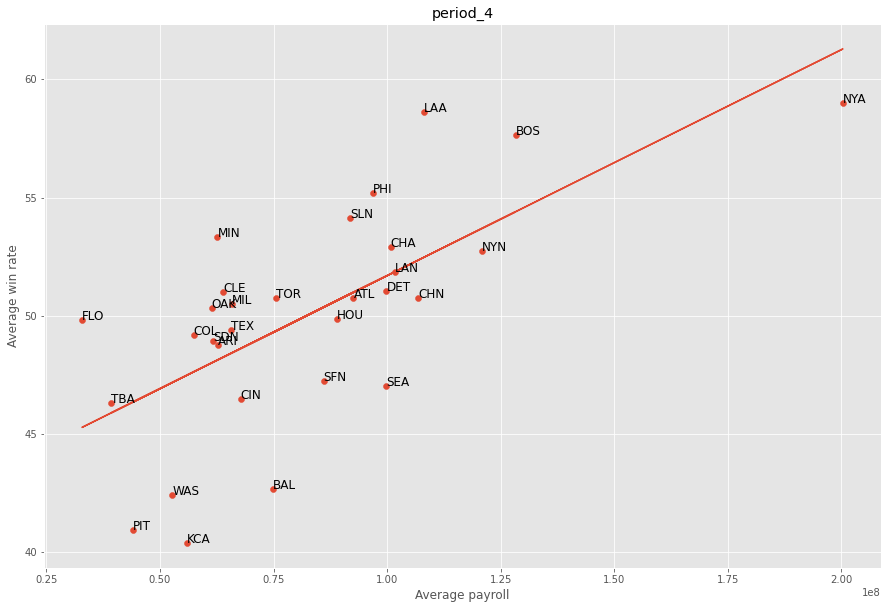

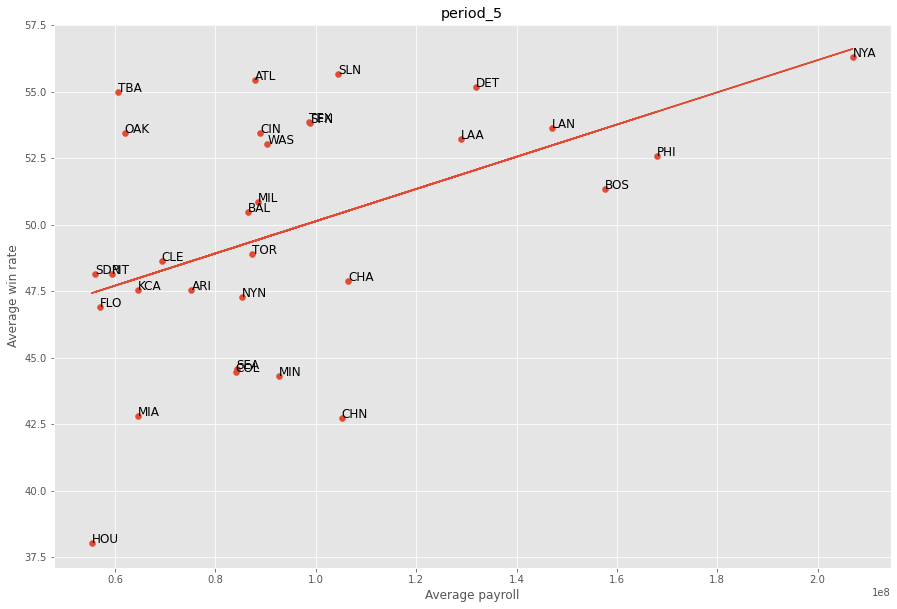

In [136]:
for period in group_names:
    # Computing average total payroll and win rate for each team per period
    sameatperiod = totalSalary_teamTable[totalSalary_teamTable.period  == period]
    pay = sameatperiod.pivot(index='Year', columns='teamID', values='totalPayroll')
    win = sameatperiod.pivot(index='Year', columns='teamID', values='WinRate')
    x_data = pay.mean().values
    y_data = win.mean().values
    # Making a scatter plot and drawing a regression line
    fit = np.polyfit(x = x_data,y = y_data,deg = 1)
    plt.figure(figsize = (15,10))
    plt.plot(x_data, fit[0] * x_data + fit[1])
    plt.scatter(x_data, y_data)
    pay = pay.transpose()
     #annotate each point with its team name.
    for i, txt in enumerate(pay.index):
        plt.annotate(txt, (x_data[i],y_data[i]),size=12)
    plt.xlabel("Average payroll")
    plt.ylabel("Average win rate")
    plt.title(period)
    plt.show()


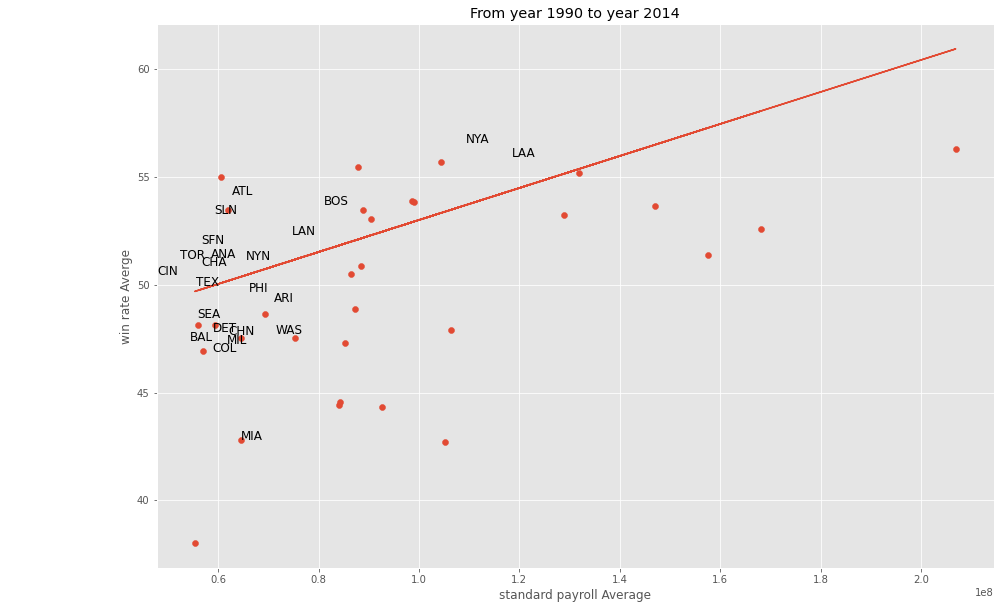

In [137]:
totalpaypivot = totalSalary_teamTable.pivot(index='Year', columns='teamID', values='totalPayroll')
totalwinpivot = totalSalary_teamTable.pivot(index='Year', columns='teamID', values='WinRate')

xDatamean = totalpaypivot.mean().values
yDatamean = totalwinpivot.mean().values
# Making a scatter plot and drawing a regression line
fit = np.polyfit(x = xDatamean,y = yDatamean,deg = 1)
plt.figure(figsize = (15,10))
plt.plot(x_data, fit[0] * x_data + fit[1])
plt.scatter(x_data, y_data)
totalpaypivot = totalpaypivot.transpose()
# annotate each point with its team name.
for i, txt in enumerate(totalpaypivot.index):
    plt.annotate(txt, (xDatamean[i],yDatamean[i]),size=12)
plt.xlabel("standard payroll Average")
plt.ylabel("win rate Averge")
plt.title("From year 1990 to year 2014")
plt.show()

In [140]:
totalSalary_teamTable['expectedWinPct'] = 50 + 2.5*totalSalary_teamTable['STD_Payroll']
totalSalary_teamTable


,teamID,totalPayroll,name,Year,Wins,Games,WinRate,AVG,STD_DEV,STD_Payroll,period,expectedWinPct
0,ANA,31135472.0,Anaheim Angels,1997,84,162,51.85,3.220817e+07,2.006071e+07,-1.072696e+06,period_2,-2.681690e+06
1,ANA,41281000.0,Anaheim Angels,1998,85,162,52.47,3.652237e+07,2.075168e+07,4.758632e+06,period_2,1.189663e+07
2,ANA,55388166.0,Anaheim Angels,1999,70,162,43.21,4.269225e+07,2.594807e+07,1.269592e+07,period_2,3.173984e+07
3,ANA,51464167.0,Anaheim Angels,2000,82,162,50.62,4.760386e+07,2.792851e+07,3.860307e+06,period_3,9.650817e+06
4,ANA,47535167.0,Anaheim Angels,2001,75,162,46.30,5.601895e+07,3.254380e+07,-8.483785e+06,period_3,-2.120941e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
853,WAS,61400000.0,Washington Nationals,2010,69,162,42.59,7.775314e+07,4.771102e+07,-1.635314e+07,period_5,-4.088280e+07
854,WAS,63856928.0,Washington Nationals,2011,80,161,49.69,7.955729e+07,5.006589e+07,-1.570037e+07,period_5,-3.925087e+07
855,WAS,80855143.0,Washington Nationals,2012,98,162,60.49,8.379261e+07,4.858813e+07,-2.937462e+06,period_5,-7.343606e+06
856,WAS,113703270.0,Washington Nationals,2013,86,162,53.09,8.670073e+07,5.764924e+07,2.700254e+07,period_5,6.750639e+07


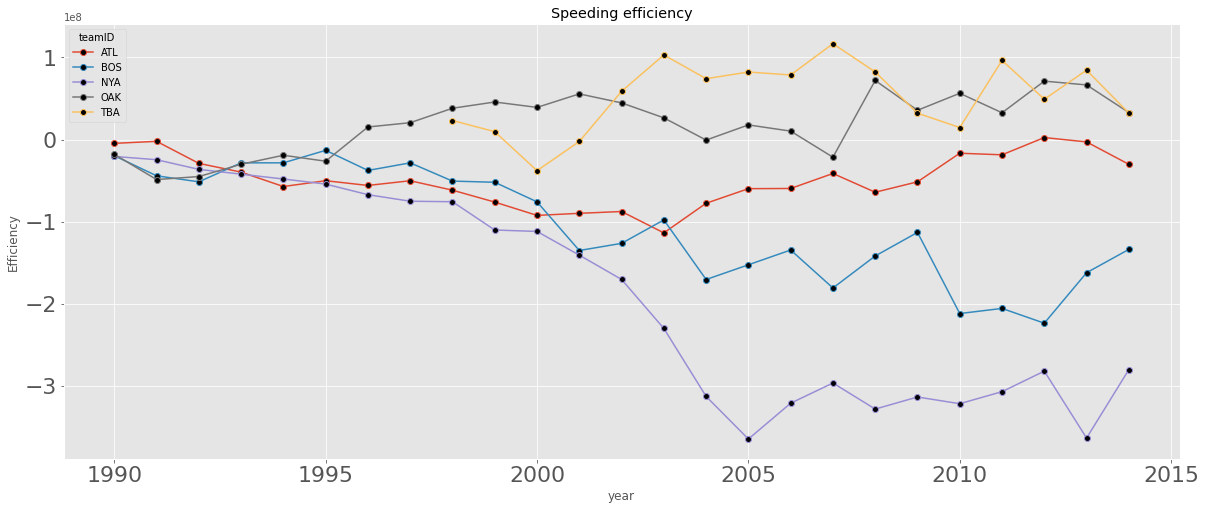

In [142]:
totalSalary_teamTable['efficiency'] = totalSalary_teamTable['WinRate'] - totalSalary_teamTable['expectedWinPct']

# Get efficiency data within the specified range
efficiencyTeam = totalSalary_teamTable[totalSalary_teamTable.Year > 1989]
efficiencyTeam = efficiencyTeam[efficiencyTeam.Year < 2015]
# Get efficiency data for each of the suggested teams


pl1 = efficiencyTeam[efficiencyTeam.teamID == 'ATL' ]
pl2 = efficiencyTeam[efficiencyTeam.teamID == 'BOS' ]
pl3 = efficiencyTeam[efficiencyTeam.teamID == 'OAK' ]
pl4 = efficiencyTeam[efficiencyTeam.teamID == 'TBA' ]
pl5 = efficiencyTeam[efficiencyTeam.teamID == 'NYA' ]
# Combing all teams efficiency
concatplot = pd.concat([pl1,pl2,pl3,pl4,pl5])

# Making line plot with year on the x-axis and efficiency on the y-axis. 
# Plotting suggested teams ( OAK, BOS, NYA, ATL, TBA).
finalplot = concatplot.pivot(index='Year', columns='teamID', values='efficiency')
finalplot.plot(kind = 'line',
               title ="Speeding efficiency",
               markevery = 1, marker='o',
               markerfacecolor='black', figsize=(20, 8)
               , legend=True, fontsize=22)
plt.xlabel("year")
plt.ylabel("Efficiency")
plt.show()
